In [ ]:
learning_rate_list = np.arange(0.05,0.25,0.02)
max_depth_list = [3, 5, 7]
n_estimators_list = np.arange(40,100,20)
gamma_list = [0]
min_child_weight_list = [1]
threshold_list = np.arange(0.1,0.4,0.001)
subsample_list = [1]

In [ ]:
for lr in learning_rate_list:
        for md in max_depth_list:
            for n in n_estimators_list:
                for g in gamma_list:
                    for w in min_child_weight_list:
                        for s in subsample_list:
                            print(lr, md, n, g, w, s)
                            #sys.stdout.flush()
                            temp = optimize_threshold(man_cross_val(masterdf, learning_rate=lr, max_depth=md, n_estimators=n, gamma=g, min_child_weight=w, subsample=s), threshold_list=threshold_list)
                            score = temp[1]
                            threshold_opt = temp[0]
                            parameter_df = parameter_df.append(pd.DataFrame([[lr, md, n, g, w, s, threshold_opt, score]], columns=cols))
                            print(score, threshold_opt)
                            #sys.stdout.flush()
                            if score > max_score:
                                max_score = score
                                parameters = [lr, md, n, g, w, s, threshold_opt]

## Traindf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random

%matplotlib inline 

In [2]:
aisles = pd.read_csv('data/aisles.csv', dtype = {
    'aisle_id': np.uint16,
    'aisle': np.str},
    usecols=['aisle_id', 'aisle'])

In [3]:
departments = pd.read_csv('data/departments.csv', dtype = {
    'department_id': np.uint16,
    'department': np.str},
    usecols=['department_id', 'department'])

In [4]:
order_products_prior = pd.read_csv('data/order_products__prior.csv', dtype = {
    'order_id': np.uint32,
    'product_id': np.uint32,
    'add_to_cart_order': np.uint16,
    'reordered': np.uint16},
    usecols=['order_id', 'product_id', 'add_to_cart_order', 'reordered'])

In [5]:
order_product_train = pd.read_csv('data/order_products__train.csv', dtype = {
    'order_id': np.uint32,
    'product_id': np.uint32,
    'add_to_cart_order': np.uint16,
    'reordered': np.uint16},
    usecols=['order_id', 'product_id', 'add_to_cart_order', 'reordered'])

In [6]:
orders = pd.read_csv('data/orders.csv', dtype = {
    'order_id': np.uint32,
    'user_id' :np.uint32,
    'eval_set': 'category',
    'order_number': np.uint16,
    'order_dow': np.uint16,
    'order_hour_of_day': np.uint8,
    'days_since_prior_order': np.float32},
                     usecols=['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'])

In [7]:
products = pd.read_csv('data/products.csv', dtype = {'product_id': np.uint16,
        'product_name': np.str,
        'aisle_id': np.uint16,
        'department_id': np.uint16},
        usecols=['product_id', 'product_name', 'aisle_id', 'department_id'])

In [8]:
priordf = pickle.load(open('data/pickle_files/priordf.p', 'rb'))
user_info = pickle.load(open('data/pickle_files/user_info.p', 'rb'))
product_info = pickle.load(open('data/pickle_files/product_info.p', 'rb'))
user_product_info = pickle.load(open('data/pickle_files/user_product_info.p', 'rb'))
ordertime_info = pickle.load(open('data/pickle_files/ordertime_info.p', 'rb'))
user_ordertime_info = pickle.load(open('data/pickle_files/user_ordertime_info.p', 'rb'))
product_ordertime_info = pickle.load(open('data/pickle_files/product_ordertime_info.p', 'rb'))
aisle_info = pickle.load(open('data/pickle_files/aisle_info.p', 'rb'))
department_info = pickle.load(open('data/pickle_files/department_info.p', 'rb'))

In [ ]:
train_users = orders[orders.eval_set == 'train'].user_id

In [63]:
train_df = pd.merge(user_product_info[user_product_info.user_id.isin(train_users)], user_info, on = 'user_id', how = 'left')

In [64]:
train_df = pd.merge(train_df, product_info, on = 'product_id', how = 'left')

In [65]:
train_df = pd.merge(train_df, aisle_info, on = 'aisle_id', how = 'left', suffixes=('', '_y'))

In [66]:
train_df = pd.merge(train_df, department_info, on = 'department_id', how = 'left', suffixes=('', '_y'))

In [67]:
train_df = pd.merge(train_df, orders[orders.eval_set == 'train'], on='user_id', how = 'left')

In [68]:
train_df = pd.merge(train_df, order_product_train, on =['order_id', 'product_id'], how = 'left')

In [69]:
train_df.head()

,user_id,product_id,user_product_order_num,user_product_last_purchase_day,user_product_order_interval_mean,user_product_order_interval_std,user_product_rank,user_product_add_order_mean,user_product_add_order_std,user_product_reorder_ratio,...,department_product_add_to_cart_order_std,department,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,1,196,10,176,19.555555,9.395625,1.5,1.400000,0.966092,1.0,...,2.369946,beverages,1187899,train,11,4,8,14.0,1.0,1.0
1,1,10258,9,176,20.125000,9.876922,3.0,3.333333,1.322876,0.9,...,2.467903,snacks,1187899,train,11,4,8,14.0,6.0,1.0
2,1,10326,1,93,42.677544,25.335363,14.5,5.000000,4.219923,0.1,...,1.801582,produce,1187899,train,11,4,8,14.0,NaN,NaN
3,1,12427,10,176,19.555555,9.395625,1.5,3.300000,2.406011,1.0,...,2.467903,snacks,1187899,train,11,4,8,14.0,NaN,NaN
4,1,13032,3,176,80.500000,51.618793,5.5,6.333333,1.527525,0.3,...,2.065538,breakfast,1187899,train,11,4,8,14.0,7.0,1.0


In [70]:
train_df.reordered.fillna(0, inplace = True)

In [71]:
train_df.rename(columns = {'reordered': 'y'}, inplace = True)

In [72]:
hour_bins = [-1,2,6,10,14,18,22,25]
hour_gourp_names = ['22-2', '3-6', '7-10', '11-14', '15-18', '19-22', '22-2']
train_df['order_hour_group'] = pd.cut(train_df.order_hour_of_day, bins = hour_bins, labels=hour_gourp_names)

In [73]:
ordertime_info.head()

,order_dow,order_hour_group,ordertime_order_num
0,0,11-14,195567
1,0,15-18,160171
2,0,19-22,61821
3,0,22-2,13619
4,0,3-6,5852


In [74]:
train_df = pd.merge(train_df, ordertime_info, on = ['order_dow', 'order_hour_group'], how = 'left')

In [172]:
train_df.columns

Index(['user_id', 'product_id', 'user_product_order_num',
       'user_product_last_purchase_day', 'user_product_order_interval_mean',
       'user_product_order_interval_std', 'user_product_rank',
       'user_product_add_order_mean', 'user_product_add_order_std',
       'user_product_reorder_ratio', 'user_product_order_interval_mean_NaN',
       'user_product_order_interval_std_NaN', 'user_product_add_order_std_NaN',
       'user_order_num', 'user_order_interval_mean', 'user_order_interval_std',
       'user_basket_size_mean', 'user_basket_size_std', 'user_history',
       'product_user_num', 'product_order_num', 'product_order_interval_mean',
       'product_order_interval_std', 'product_reorder_num',
       'product_reorder_user_num', 'product_reorder_ratio',
       'product_reorder_user_ratio', 'product_add_to_cart_order_mean',
       'product_add_to_cart_order_std', 'product_name', 'aisle_id',
       'department_id', 'product_order_interval_mean_NaN',
       'product_order_interv

In [75]:
user_ordertime_info.head()

,user_id,order_dow,order_hour_group,user_ordertime_order_num
0,1,1,11-14,1
1,1,1,15-18,1
2,1,1,7-10,1
3,1,2,7-10,2
4,1,3,11-14,1


In [76]:
train_df = pd.merge(train_df, user_ordertime_info, on = ['user_id', 'order_dow', 'order_hour_group'], how = 'left')

In [77]:
train_df = pd.merge(train_df, product_ordertime_info, on = ['product_id', 'order_dow', 'order_hour_group'], how = 'left')

In [79]:
train_df['user_ordertime_order_num'].fillna(0, inplace = True)
train_df['product_ordertime_order_num'].fillna(0, inplace = True)

In [89]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['order_hour_group'])], axis = 1)

In [90]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['order_dow'], prefix='order_dow')], axis = 1)

In [93]:
info_columns = ['user_id', 'product_id', 'product_name', 'aisle_id', 'department_id', 'aisle', 'department', 'order_id', 'eval_set', 'add_to_cart_order', 'y', 'order_hour_group', 'order_dow', 'order_hour_of_day']

In [94]:
X = train_df.drop(info_columns, axis = 1)

In [95]:
y = train_df.y

## Models!

### Feature Importance

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random

%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold, GridSearchCV, GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc,accuracy_score,recall_score,precision_score,f1_score
from xgboost import XGBClassifier

In [100]:
#xgb_model = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=80, gamma=0, min_child_weight=3, subsample=1, nthread=-1)

In [101]:
#xgb_model_fit = xgb_model.fit(X,y)

In [102]:
X.columns.shape

(68,)

In [103]:
xgb_model_fit.feature_importances_.shape

(68,)

In [104]:
#xgb_model_fit.feature_importances_

array([ 0.03203342,  0.19498608,  0.05949065,  0.01313172,  0.0206924 ,
        0.01233585,  0.00119379,  0.07879029,  0.        ,  0.        ,
        0.        ,  0.0252686 ,  0.01830482,  0.01193792,  0.01730999,
        0.00815758,  0.13270991,  0.02268205,  0.00417827,  0.04019101,
        0.00577   ,  0.01333068,  0.01452447,  0.02686033,  0.05789892,
        0.01014723,  0.00298448,  0.00019897,  0.        ,  0.        ,
        0.00318345,  0.00119379,  0.00736172,  0.00417827,  0.00099483,
        0.00019897,  0.00318345,  0.00179069,  0.00278552,  0.00238758,
        0.00278552,  0.00019897,  0.00378034,  0.00039793,  0.        ,
        0.        ,  0.0005969 ,  0.0005969 ,  0.00298448,  0.00218862,
        0.        ,  0.10664544,  0.00537207,  0.00855551,  0.00676482,
        0.00039793,  0.00039793,  0.00019897,  0.00079586,  0.        ,
        0.00119379,  0.00238758,  0.        ,  0.00019897,  0.        ,
        0.0005969 ,  0.00019897,  0.00039793], dtype=float32)

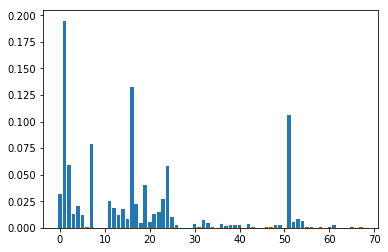

In [105]:
#print(xgb_model_fit.feature_importances_)

plt.bar(range(len(xgb_model_fit.feature_importances_)), xgb_model_fit.feature_importances_)
plt.show();

In [108]:
feature_importance = pd.DataFrame(columns = ['feature', 'importance'])
for index, importance in enumerate(xgb_model_fit.feature_importances_):
    feature_importance.loc[index] = [X.columns[index], importance]
feature_importance.sort_values('importance', inplace = True, ascending = False)
feature_importance.reset_index(drop = True, inplace = True)

In [110]:
feature_importance.head()

,feature,importance
0,user_product_last_purchase_day,0.194986
1,user_history,0.132710
2,days_since_prior_order,0.106645
3,user_product_reorder_ratio,0.078790
4,user_product_order_interval_mean,0.059491


In [111]:
featuredf = feature_importance.iloc[:3,:].sort_values('importance', ascending = True)

In [112]:
import matplotlib

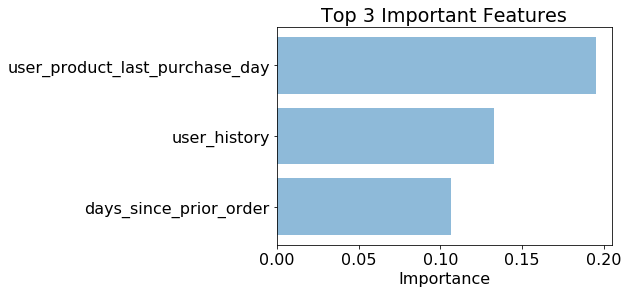

In [113]:
matplotlib.rcParams.update({'font.size': 16})
objects = (featuredf.feature[:3])
y_pos = np.arange(len(objects))
performance = featuredf.importance[:3]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.title('Top 3 Important Features')
 
plt.show()

In [152]:
import copy
result_df = copy.deepcopy(train_df )
result_df['XGB_pred_prob'] = xgb_model_fit.predict_proba(X)[:, 1:]

In [143]:
result_df.shape

(8474661, 83)

In [148]:
bins = [0, 0.2, 1]
group_names = [0, 1]
result_df['XGB_pred_y'] = pd.cut(result_df['XGB_pred_prob'], bins, labels=group_names)

In [151]:
new_f1_score(result_df)

0.3764929269287516

### Tuning Parameters

In [1]:
def get():
    return 1,2

In [5]:
a = get()

In [6]:
a

(1, 2)

In [206]:
random.seed(808)
random_users = random.sample(set(train_df.user_id), 1000)

In [207]:
sample_train_df = train_df[train_df.user_id.isin(random_users)]

In [208]:
sample_train_df.shape

(63544, 82)

In [198]:
def new_f1_score(df):
    TNdf = pd.DataFrame(df[(df.y == 0) & (df.XGB_pred_y == 0)].groupby('user_id')['product_id'].nunique())
    TNdf.rename(columns = {'product_id': 'TN'}, inplace = True)
    TNdf.reset_index(inplace = True)
    
    TPdf = pd.DataFrame(df[(df.y == 1) & (df.XGB_pred_y == 1)].groupby('user_id')['product_id'].nunique())
    TPdf.rename(columns = {'product_id': 'TP'}, inplace = True)
    TPdf.reset_index(inplace = True)
    
    FNdf = pd.DataFrame(df[(df.y == 1) & (df.XGB_pred_y == 0)].groupby('user_id')['product_id'].nunique())
    FNdf.rename(columns = {'product_id': 'FN'}, inplace = True)
    FNdf.reset_index(inplace = True)
    
    FPdf = pd.DataFrame(df[(df.y == 0) & (df.XGB_pred_y == 1)].groupby('user_id')['product_id'].nunique())
    FPdf.rename(columns = {'product_id': 'FP'}, inplace = True)
    FPdf.reset_index(inplace = True)
    
    matrix_df = pd.merge(TNdf, TPdf, on = 'user_id', how = 'outer')
    matrix_df = pd.merge(matrix_df, FNdf, on = 'user_id', how = 'outer')
    matrix_df = pd.merge(matrix_df, FPdf, on = 'user_id', how = 'outer')
    
    matrix_df.fillna(0, inplace = True)
    matrix_df['precision'] = matrix_df.TP / (matrix_df.FP + matrix_df.TP)
    matrix_df['recall'] = matrix_df.TP / (matrix_df.FN + matrix_df.TP)
    matrix_df['f1'] = 2*matrix_df.TP / (2*matrix_df.TP+matrix_df.FP+matrix_df.FN)
    matrix_df.fillna(1, inplace = True)
    return matrix_df.f1.mean()

In [199]:
def man_cross_val(masterdf, learning_rate=0.2, max_depth=6, n_estimators=100, gamma=0, min_child_weight=1, subsample=1, threshold=0.2):
    info_columns = ['user_id', 'product_id', 'product_name', 'aisle_id', 'department_id', 'aisle', 'department', 'order_id', 'eval_set', 'add_to_cart_order', 'y', 'order_hour_group', 'order_dow', 'order_hour_of_day']
    X = masterdf.drop(info_columns, axis = 1)
    y = masterdf.y
    kf = GroupKFold(n_splits=5)
    final_df = pd.DataFrame()
    for i, (train_index, test_index) in enumerate(kf.split(masterdf, groups=masterdf['user_id'].values)):
        xgb_model = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, gamma=gamma, min_child_weight=min_child_weight, subsample=subsample)
        xgb_fit = xgb_model.fit(X.iloc[train_index], y.iloc[train_index])
        result = xgb_fit.predict_proba(X.iloc[test_index])
        new_df = masterdf.iloc[test_index][['y', 'user_id', 'product_id']]
        new_df['True'] = result[:, 1:]
        new_df['set'] = i
        final_df = pd.concat([final_df, new_df])
    return final_df

In [200]:
def optimize_threshold(result_df, threshold_list=[0.2]):
    threshold_opt = 0.2
    max_score = 0
    for threshold in threshold_list:
        scores = []
        bins = [0, threshold, 1]
        group_names = [0, 1]
        result_df['XGB_pred_y'] = pd.cut(result_df['True'], bins, labels=group_names).astype(np.float32)
        for i in range(5):
            scores.append(new_f1_score(result_df[result_df.set == i]))
        score = np.mean(scores)
        #print(threshold, score)
        if score > max_score:
            max_score = score
            threshold_opt = threshold
    return threshold_opt, max_score

In [201]:
def tune_para_xgb(masterdf, learning_rate_list=[0.2], max_depth_list=[6], n_estimators_list=[100], gamma_list=[0], min_child_weight_list=[1], subsample_list=[1], threshold_list=[0.2]):
    max_score = 0
    parameters = [0.2, 6, 100, 0, 1, 1, 0.2]
    cols = ['learning_rate', 'max_depth', 'n_estimators', 'gamma', 'min_child_weight_list', 'subsapmle', 'opt_threshold', 'score']
    parameter_df = pd.DataFrame(columns = cols)
    for lr in learning_rate_list:
        for md in max_depth_list:
            for n in n_estimators_list:
                for g in gamma_list:
                    for w in min_child_weight_list:
                        for s in subsample_list:
                            print(lr, md, n, g, w, s)
                            #sys.stdout.flush()
                            temp = optimize_threshold(man_cross_val(masterdf, learning_rate=lr, max_depth=md, n_estimators=n, gamma=g, min_child_weight=w, subsample=s), threshold_list=threshold_list)
                            score = temp[1]
                            threshold_opt = temp[0]
                            parameter_df = parameter_df.append(pd.DataFrame([[lr, md, n, g, w, s, threshold_opt, score]], columns=cols))
                            print(score, threshold_opt)
                            #sys.stdout.flush()
                            if score > max_score:
                                max_score = score
                                parameters = [lr, md, n, g, w, s, threshold_opt]
    return max_score, parameters, parameter_df

In [202]:
learning_rate_list = np.arange(0.05,0.25,0.02)
max_depth_list = [3, 6]
n_estimators_list = np.arange(40,100,20)
gamma_list = [0]
min_child_weight_list = [1, 3]
threshold_list = np.arange(0.1,0.3,0.001)
subsample_list = [0.8, 1]

In [210]:
import copy
masterdf = copy.deepcopy(sample_train_df )

In [211]:
# import sys

# orig_stdout = sys.stdout
# f = open('out.txt', 'w')
# sys.stdout = f

In [ ]:
parameter_optimize_result = tune_para_xgb(masterdf, learning_rate_list=learning_rate_list, max_depth_list=max_depth_list, n_estimators_list=n_estimators_list, gamma_list=gamma_list, min_child_weight_list=min_child_weight_list, subsample_list = subsample_list, threshold_list=threshold_list)

In [218]:
parameter_optimize_result[:2]

(0.37580078994796473, [0.13, 6, 60, 0, 1, 1, 0.19400000000000009])

In [ ]:
#pickle.dump(parameter_optimize_result, open('parameter_optimize_result.p', 'wb'))